In [1]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
!ls

analysis.ipynb
Analysis.ipynb
Bandit_experiment.ipynb
cfg.py
eGreedyMAB_2000_500_BernoulliArm_0.5_results.pkl
eGreedyMAB_2000_500_BernoulliArm_1.0_results.pkl
eGreedyMAB_2000_500_GaussianArm_0.5_results.pkl
eGreedyMAB_2000_500_GaussianArm_1.0_results.pkl
mab.py
main.py
__pycache__
standard_epsg_results.tsv


In [3]:
def process(df):
    ## get cumulative reward
    cumsum_base = np.array([], dtype='float')
    for e in df['sim'].unique():
        rundf = df[df['sim'] == e]
        run_cumsum = np.cumsum(rundf['reward'])
        cumsum_base = np.append(cumsum_base, run_cumsum)
    df['cumulative_reward'] = cumsum_base
    
    ## check if the optimal arm is selected at each run
    df['chosen_optimal'] = (df['chosen_arm'] == df['optimal_arm']).astype('int')
    
    ## groupby
    result = df[['epsilon', 'step', 'reward', 'chosen_optimal']].groupby(by=['epsilon', 'step']).mean(numeric_only=False)
    result.reset_index(drop=False, inplace=True)
    
    return result

In [4]:
def plot_results(dfs, column, title, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    for item in dfs:
        plt.plot(item[column], label=f"eps={item['epsilon'].iloc[0]}")
    plt.grid(True)
    plt.legend()
    plt.title(title)
    plt.show()

# alpha = 1

In [5]:
with open("./eGreedyMAB_2000_500_BernoulliArm_results.pkl", 'rb') as f:
    bernoulli = pickle.load(f)
    
with open("./eGreedyMAB_2000_500_GaussianArm_results.pkl", 'rb') as f:
    gaussian = pickle.load(f)

In [6]:
print('bernoulli')
display(bernoulli[0].head())
print()
display(bernoulli[0].tail())
print()
print('gaussian')
display(gaussian[0].head())
print()
display(gaussian[0].tail())

bernoulli


,epsilon,sim,step,chosen_arm,optimal_arm,reward
0,0.0,0,0,4,0,1.0
1,0.0,0,1,4,0,0.0
2,0.0,0,2,4,0,1.0
3,0.0,0,3,4,0,0.0
4,0.0,0,4,4,0,0.0


,epsilon,sim,step,chosen_arm,optimal_arm,reward
999995,0.0,1999,495,8,0,1.0
999996,0.0,1999,496,8,0,1.0
999997,0.0,1999,497,8,0,1.0
999998,0.0,1999,498,8,0,1.0
999999,0.0,1999,499,8,0,1.0



gaussian


,epsilon,sim,step,chosen_arm,optimal_arm,reward
0,0.0,0,0,4,2,-1.571314
1,0.0,0,1,1,2,13.887910
2,0.0,0,2,1,2,6.170190
3,0.0,0,3,1,2,0.247547
4,0.0,0,4,1,2,2.732150


,epsilon,sim,step,chosen_arm,optimal_arm,reward
999995,0.0,1999,495,4,2,-0.801373
999996,0.0,1999,496,4,2,-0.702989
999997,0.0,1999,497,4,2,3.563834
999998,0.0,1999,498,4,2,0.298446
999999,0.0,1999,499,4,2,0.260266


In [7]:
bern_results = []
for df in tqdm(bernoulli):
    bern_results.append(process(df))
    
gaus_results = []
for df in tqdm(gaussian):
    gaus_results.append(process(df))

100%|██████████| 11/11 [00:27<00:00,  2.52s/it]


In [8]:
print(f"Bernoulli\n")
print("Greedy")
display(bern_results[0].head())
print()
display(bern_results[0].tail())
print()

print("egreedy")
display(bern_results[1].head())
print()
display(bern_results[1].tail())

Bernoulli

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,0.4530,0.1035
1,0.0,1,0.5145,0.1510
2,0.0,2,0.5695,0.1760
3,0.0,3,0.5955,0.1915
4,0.0,4,0.5885,0.1990


,epsilon,step,reward,chosen_optimal
495,0.0,495,0.6140,0.2075
496,0.0,496,0.6115,0.2075
497,0.0,497,0.6140,0.2075
498,0.0,498,0.6215,0.2075
499,0.0,499,0.6165,0.2075



egreedy


,epsilon,step,reward,chosen_optimal
0,0.05,0,0.4560,0.0930
1,0.05,1,0.5235,0.1365
2,0.05,2,0.5570,0.1525
3,0.05,3,0.5865,0.1680
4,0.05,4,0.5870,0.1765


,epsilon,step,reward,chosen_optimal
495,0.05,495,0.7620,0.4750
496,0.05,496,0.7535,0.4745
497,0.05,497,0.7510,0.4755
498,0.05,498,0.7525,0.4680
499,0.05,499,0.7600,0.4775


In [9]:
print(f"Gaussian\n")
print("Greedy")
display(gaus_results[0].head())
print()
display(gaus_results[0].tail())
print()

print("egreedy")
display(gaus_results[1].head())
print()
display(gaus_results[1].tail())

Gaussian

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,1.036279,0.1025
1,0.0,1,1.044320,0.0915
2,0.0,2,1.136915,0.0895
3,0.0,3,1.165342,0.0880
4,0.0,4,0.819647,0.0870


,epsilon,step,reward,chosen_optimal
495,0.0,495,0.962481,0.003
496,0.0,496,0.975183,0.003
497,0.0,497,1.036645,0.003
498,0.0,498,1.010939,0.003
499,0.0,499,0.998161,0.003



egreedy


,epsilon,step,reward,chosen_optimal
0,0.05,0,0.753559,0.0975
1,0.05,1,0.990626,0.0850
2,0.05,2,0.983000,0.0845
3,0.05,3,0.933115,0.0835
4,0.05,4,0.868242,0.0800


,epsilon,step,reward,chosen_optimal
495,0.05,495,1.110210,0.0140
496,0.05,496,1.073480,0.0150
497,0.05,497,0.962028,0.0120
498,0.05,498,1.091181,0.0120
499,0.05,499,1.066637,0.0115


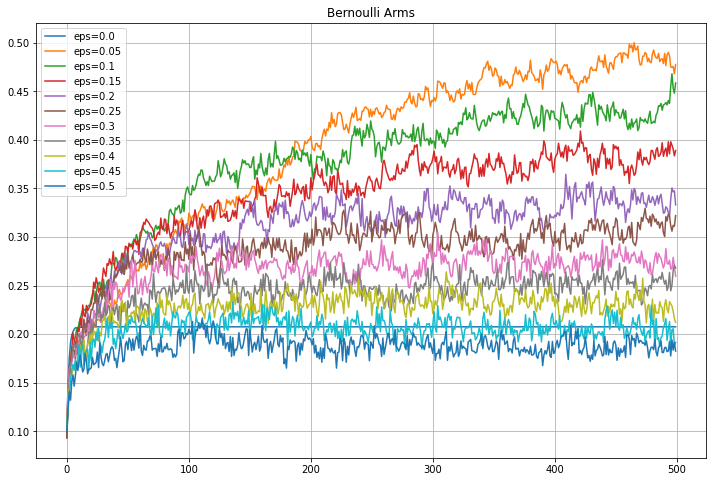

In [10]:
plot_results(bern_results, column='chosen_optimal', title="Bernoulli Arms")

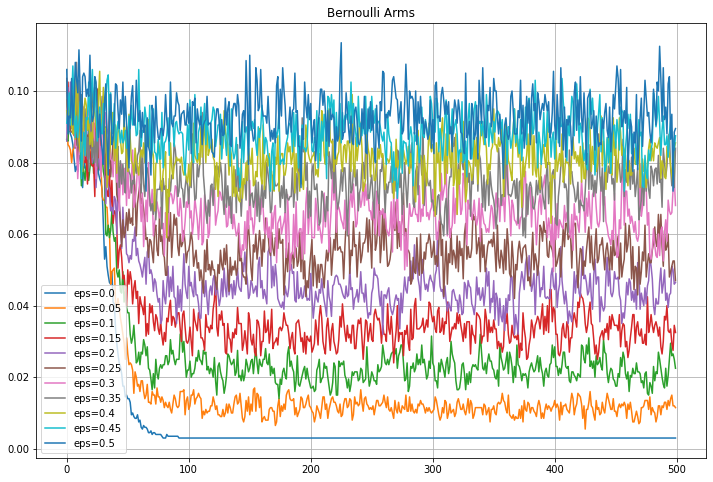

In [11]:
plot_results(gaus_results, column='chosen_optimal', title="Gaussian Arms")

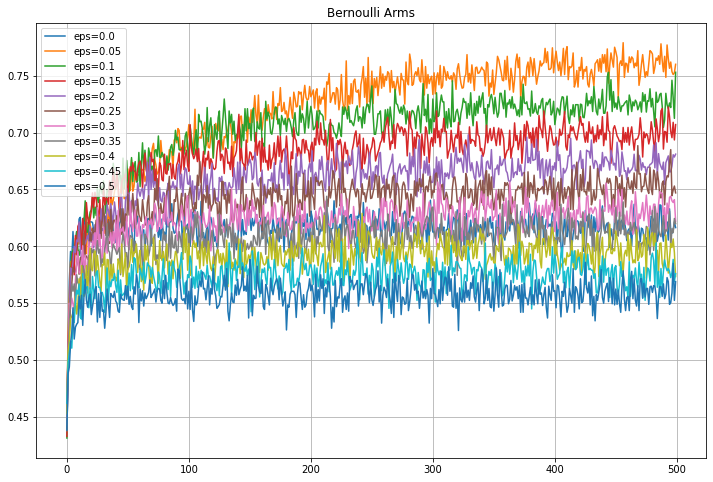

In [12]:
plot_results(bern_results, column='reward', title="Bernoulli Arms")

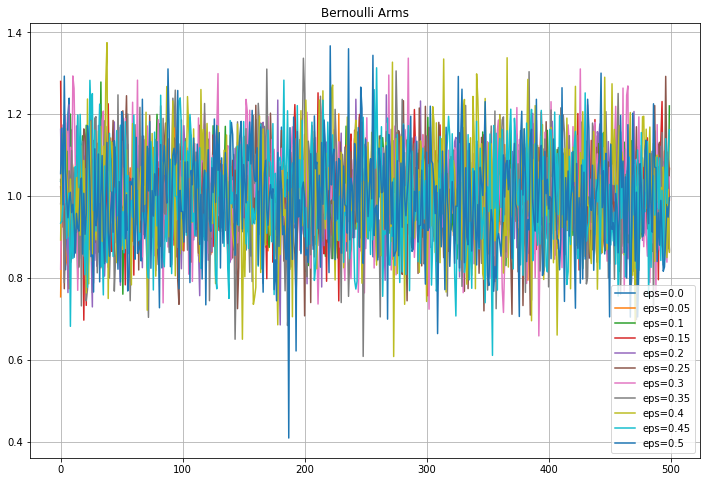

In [13]:
plot_results(gaus_results, column='reward', title="Bernoulli Arms")